# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [1]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd, numpy as np, matplotlib.pyplot as plt, datetime
# N'oubliez pas d'avoir installé les librairies pandas, numpy et matplotlib via la commande pip

In [2]:
#On importe les données dans un dataframe
df_historique = pd.read_excel("historique_immobilier_paris_2017_2021_vdef2.xlsx", sheet_name='Sheet1')


Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [3]:
#On vérifie que le type des données attribué par pandas est cohérent
print(df_historique.dtypes)

date_mutation       datetime64[ns]
valeur_fonciere            float64
adresse_numero               int64
adresse_nom_voie            object
code_postal                  int64
nom_commune                 object
code_type_local              int64
type_local                  object
surface_reelle               int64
dtype: object


### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [4]:
liste_type = df_historique['type_local'].unique()

print(f'la liste des différents types de biens immobiliers que nous avons dans les données est {liste_type} ')


la liste des différents types de biens immobiliers que nous avons dans les données est ['Appartement' 'Local industriel. commercial ou assimilé'] 


On observe qu'il y a ? types de biens, et que leurs codes types sont ?. 

In [5]:
nb_type = len(df_historique['type_local'].unique())
code_type = df_historique['code_type_local'].unique() 

print(f'il y a {nb_type} types de local et les codes sont {code_type}')

# création d'un tableau récap
df_type_local = df_historique[['type_local','code_type_local']]
df_type_local.drop_duplicates(subset=['type_local'])

il y a 2 types de local et les codes sont [2 4]


,type_local,code_type_local
0,Appartement,2
18,Local industriel. commercial ou assimilé,4


### 3. Nombre de transactions

In [6]:
#On verifie le nombre de transactions que nous avons dans notre dataframe
nb_transaction = df_historique['date_mutation'].count()
nb_transaction_appartement = df_historique[df_historique['type_local'] == 'Appartement'].shape[0]
nb_transaction_commerciaux = df_historique[df_historique['type_local'] != 'Appartement'].shape[0]

print(f'le nombre de transactions dans les données est : {nb_transaction}')
print(f'le nombre de transactions pour les appartements dans les données est : {nb_transaction_appartement}')
print(f'le nombre de transactions pour les locaux commerciaux dans les données est : {nb_transaction_commerciaux}')


le nombre de transactions dans les données est : 26196
le nombre de transactions pour les appartements dans les données est : 24353
le nombre de transactions pour les locaux commerciaux dans les données est : 1843


In [7]:
# Nombre de transaction par type de local et par année

# ajout d'une colonne pour convertir la date de mutation en année
df_historique['annee'] = df_historique['date_mutation'].dt.year

# création du dataframe par annee
df_historique_annee = df_historique.groupby('annee').agg({'date_mutation':'count'})
display(df_historique_annee)

print(df_historique_annee['date_mutation'].mean())

# création du dataframe par annee et type local
df_historique_annee_typelocal = df_historique.groupby(['annee','type_local']).agg({'date_mutation':'count'})
display(df_historique_annee_typelocal)

,date_mutation
annee,
2017,5555
2018,5427
2019,5683
2020,4463
2021,5068


5239.2


date_mutation
annee type_local                                             
2017  Appartement                                        5206
      Local industriel. commercial ou assimilé            349
2018  Appartement                                        5076
      Local industriel. commercial ou assimilé            351
2019  Appartement                                        5251
      Local industriel. commercial ou assimilé            432
2020  Appartement                                        4127
      Local industriel. commercial ou assimilé            336
2021  Appartement                                        4693
      Local industriel. commercial ou assimilé            375

### 4. interval de l'historique des données

In [8]:
#On vérifie également la plage de l'historique disponible
min_date = df_historique['date_mutation'].min()
max_date = df_historique['date_mutation'].max()

print(f'la première date de transaction dans les données est le {min_date}')
print(f'la dernière date de transaction dans les données est le {max_date}')

la première date de transaction dans les données est le 2017-01-02 00:00:00
la dernière date de transaction dans les données est le 2021-12-31 00:00:00


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [9]:
# Calcul de la colonne
df_historique['prix_m2']= df_historique['valeur_fonciere'] / df_historique['surface_reelle']

display(df_historique.head(2))

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,annee,prix_m2
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,2017,11011.193562
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,2017,9671.732877


Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [10]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
df_prix_appt = df_historique.loc[df_historique['type_local']=='Appartement',['date_mutation','valeur_fonciere','code_postal','surface_reelle','prix_m2', 'annee']]
display(df_prix_appt.shape)
display(df_prix_appt.head(2))


(24353, 6)

,date_mutation,valeur_fonciere,code_postal,surface_reelle,prix_m2,annee
0,2017-01-03,5.505597e+05,75003,50,11011.193562,2017
1,2017-01-12,1.576492e+06,75008,163,9671.732877,2017


In [11]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée

# création du dataframe d'agrégation
prix_appt = df_prix_appt.groupby('annee').agg({'date_mutation':'count','surface_reelle':'mean','prix_m2':'mean'})
display(prix_appt)

# Reset de l'index
prix_appt = prix_appt.reset_index()



,date_mutation,surface_reelle,prix_m2
annee,,,
2017,5206,44.627737,9492.859195
2018,5076,44.271671,10031.403432
2019,5251,43.361645,10562.712581
2020,4127,42.900654,10674.872650
2021,4693,43.479864,10455.600126


On constate sur la moyenne des prix de vente des appartements à Paris que ? <br>
Nous allons créer un graphique pour mieux le visualiser.

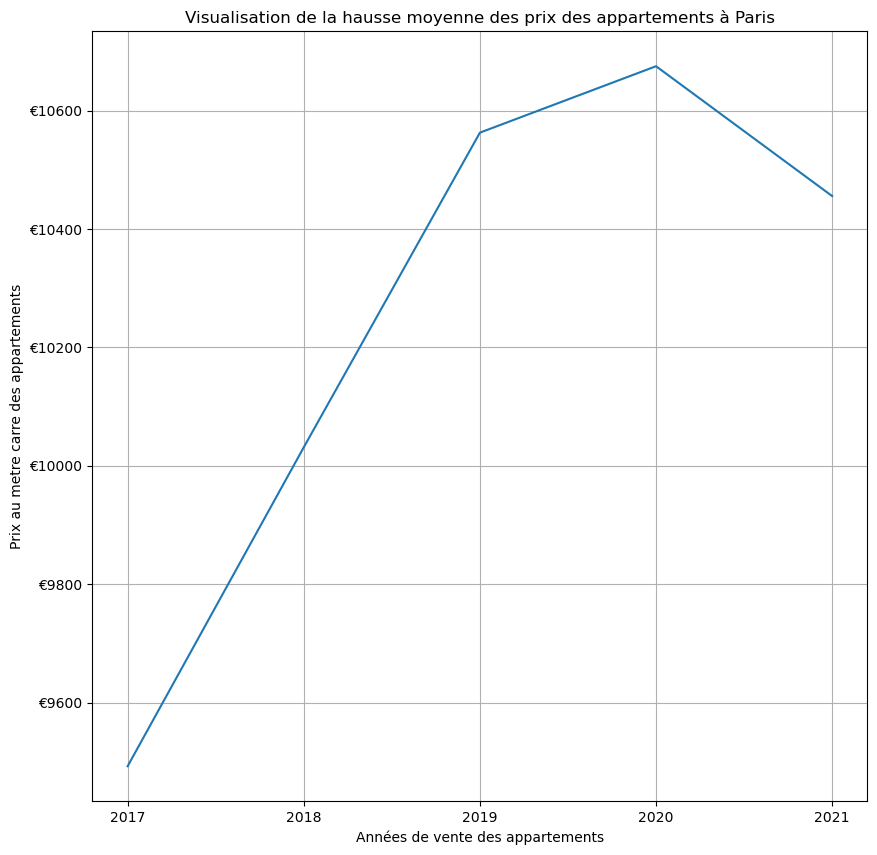

In [12]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(10,10))
plt.plot(['2017','2018','2019','2020','2021'],prix_appt['prix_m2'])
plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix au metre carre des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Visualisation de la hausse moyenne des prix des appartements à Paris')
plt.show()

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [13]:
#Liste des codes postaux dans nos données.
df_prix_appt['code_postal'].unique()

array([75003, 75008, 75001, 75006, 75005, 75007, 75010, 75009, 75011,
       75012, 75013, 75014, 75015, 75016, 75017, 75018, 75020, 75019,
       75004, 75002], dtype=int64)

In [14]:
# #Créeons un dataframe pour une deuxième visualisation avec l'evolution des prix par arrondissement
# Créez la table pivot
prix_arrd = pd.pivot_table(df_prix_appt, values=['prix_m2'], index=['code_postal'], columns=['annee'], aggfunc='mean')

# Réinitialisez l'index pour obtenir le code postal en tant que colonne
prix_arrd = prix_arrd.reset_index()

# visualisation
display(prix_arrd)

code_postal       prix_m2                                            \
annee                      2017          2018          2019          2020   
0           75001  11762.706289  12621.226146  13269.256149  13405.991820   
1           75002  10920.126562  11309.461297  12150.543211  12181.589810   
2           75003  11679.818729  12469.997687  12813.403980  12834.313205   
3           75004  12407.227522  13431.886791  13641.494658  13104.738603   
4           75005  11306.752404  12056.438160  12928.383859  12959.757302   
5           75006  12508.837036  12896.276640  13378.073631  13807.087614   
6           75007  11845.118831  12553.177030  12921.892652  13109.829386   
7           75008  10132.798372  10631.299183  11195.449314  11702.927736   
8           75009   9582.311203  10187.210521  10957.783651  10981.242522   
9           75010   8747.004273   9328.031275   9999.125882  10200.332358   
10          75011   9137.783721   9688.945219  10376.908666  10533.071590   
11          75012   8454.848964   8937.726508   9497.677106   9691.106390   
12          75013   8344.893374   8755.219424   9340.366016   9333.897460   
13          75014   9054.806033   9433.545087  10027.167999  10107.800126   
14          75015   9097.893718   9328.040835   9822.107561  10061.238564   
15          75016   9808.824060  10244.444401  10825.033083  10911.135562   
16          75017   9336.868287   9880.663007  10399.607301  10536.288246   
17          75018   8466.296314   9152.933880   9928.336981   9946.886945   
18          75019   7621.764808   8265.857054   8850.261628   8982.620746   
19          75020   7886.023336   8485.162808   9093.992492   9329.305302   

                     
annee          2021  
0      13379.498578  
1      11773.445419  
2      12660.546567  
3      12936.958334  
4      12605.843983  
5      13795.048958  
6      13118.135985  
7      11710.094574  
8      10732.184387  
9      10043.466941  
10     10351.644701  
11      9657.980179  
12      9164.625982  
13      9993.616203  
14      9971.240600  
15     10790.307817  
16     10372.368746  
17      9665.640629  
18      8828.586057  
19      9114.398249

code_postal       prix_m2                                           \
annee                      2017          2018          2019         2020   
0           75001  11762.706289  12621.226146  13269.256149  13405.99182   

                     
annee          2021  
0      13379.498578

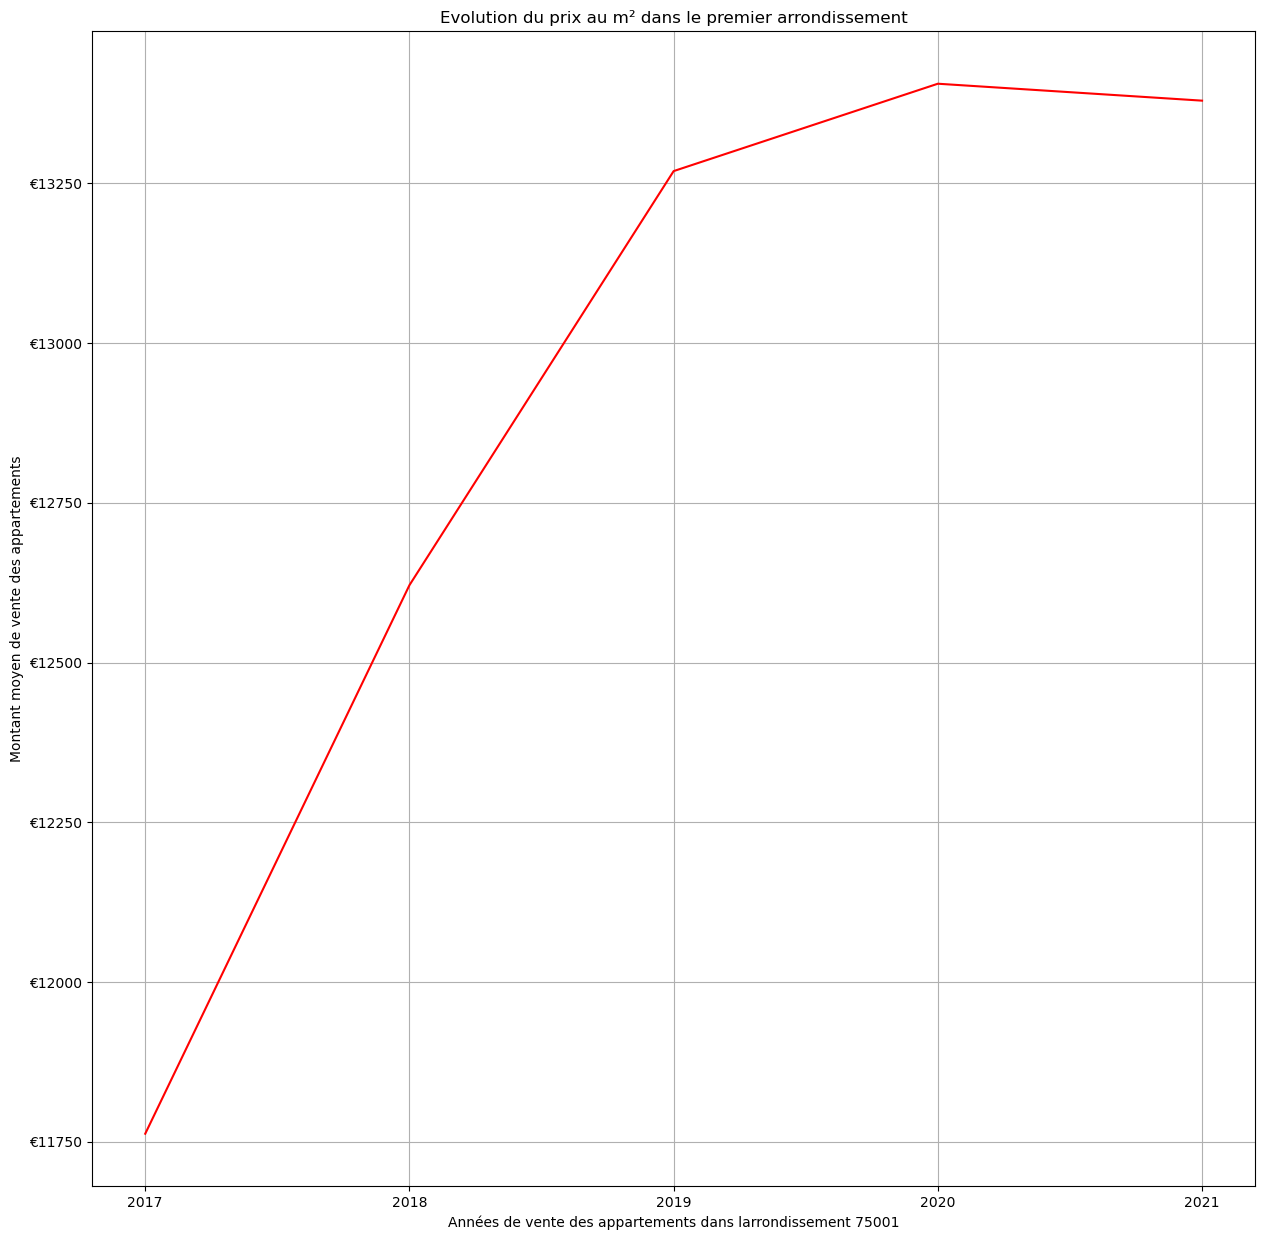

In [15]:
# Filtrer les lignes où le code postal est égal à 75001
prix_arrd_75001 = prix_arrd.loc[prix_arrd['code_postal'] == 75001]
display(prix_arrd_75001)

#Création d'un graphique pour visualiser la hausse de la moyenne des prix au metre carré dans le premier arrondissement
plt.figure(figsize=(15,15))
plt.plot(['2017','2018','2019','2020','2021'],prix_arrd_75001['prix_m2'].mean(), color='red')
plt.xlabel('Années de vente des appartements dans larrondissement 75001')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans le premier arrondissement')
plt.show()
           

Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

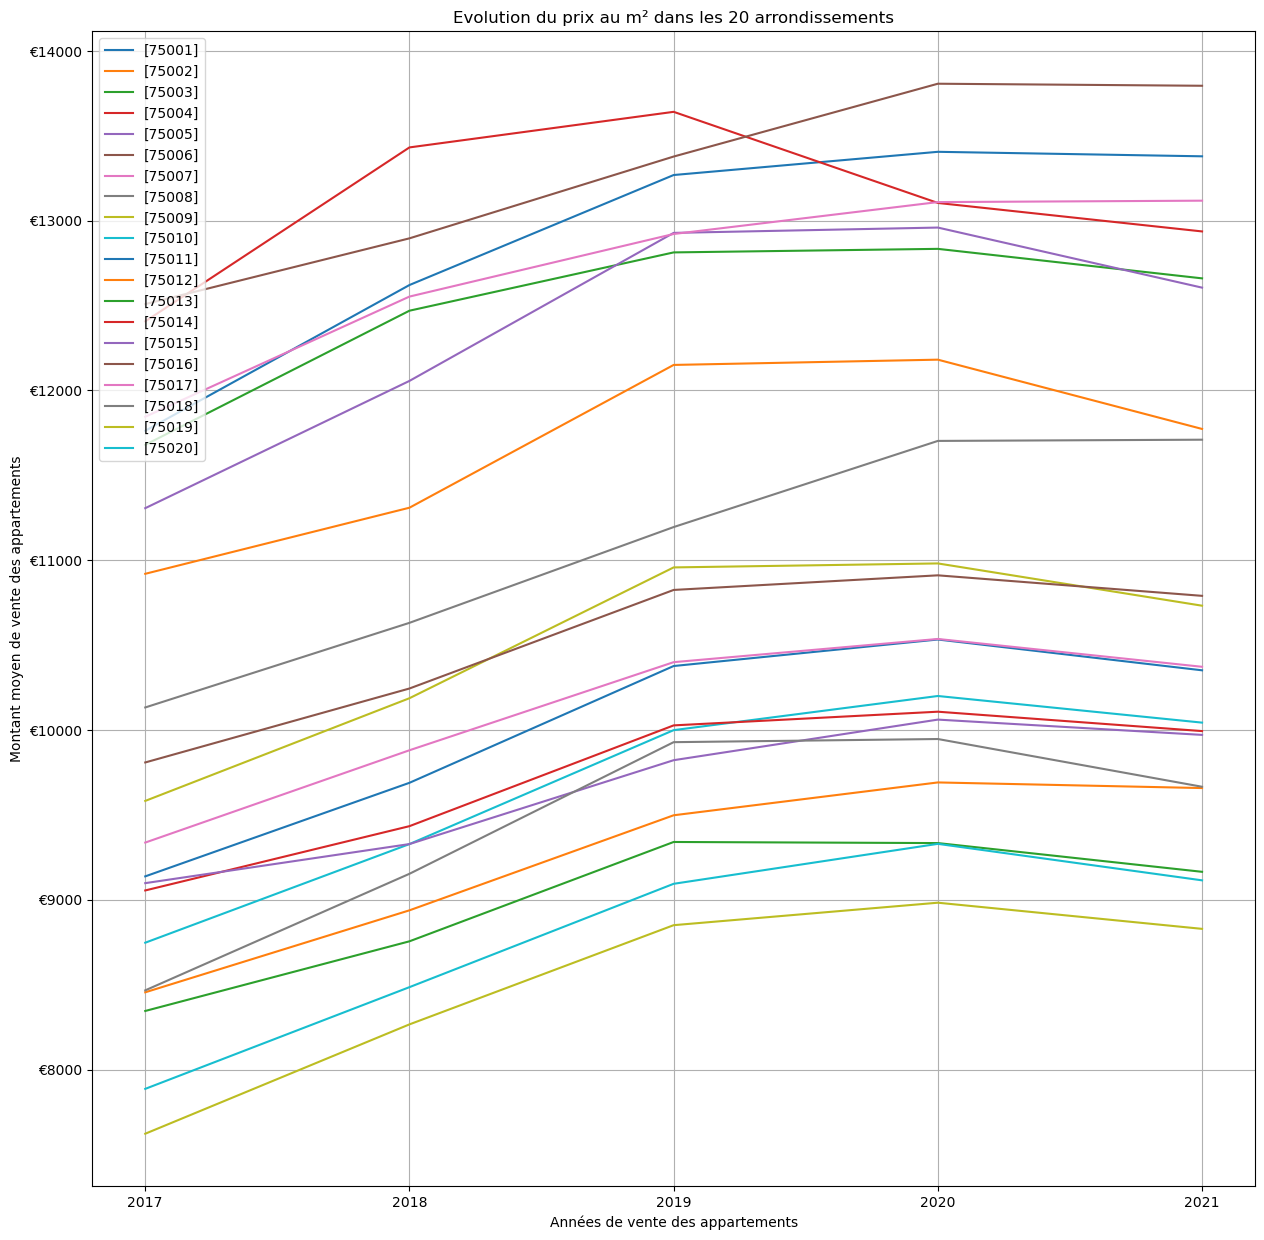

In [16]:
#On affiche l'évolution du prix au m² par arrondissement dans Paris
plt.figure(figsize=(15,15))
interval_historique=['2017','2018','2019','2020','2021']

# Nombre de courbes en fonction du nombre d'arrondissement
nb_arrd = prix_arrd.shape[0]

# Création d'un graphique comportant plusieurs courbes
for i in range(nb_arrd):
    arrd_data = prix_arrd.loc[[i],:]  # Données spécifiques pour chaque arrondissement, un par un, selon l'index
    y = arrd_data['prix_m2'].mean()
    label = arrd_data['code_postal'].tolist()
    plt.plot(interval_historique, y, label=label)
    
    
plt.xlabel('Années de vente des appartements')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans les 20 arrondissements')
plt.legend(loc='upper left')
plt.show()



On observe que globalement que ?

In [17]:
print("on observe une hausse jusqu'en 2019, de 2019 à 2020 il peut y avoir une légère hausse/stabilisation/baisse puis une stabilisation voire une baisse à partir de 2020, peut-être lié au Covid. Néanmoins, au global, les prix ont augmenté.")

on observe une hausse jusqu'en 2019, de 2019 à 2020 il peut y avoir une légère hausse/stabilisation/baisse puis une stabilisation voire une baisse à partir de 2020, peut-être lié au Covid. Néanmoins, au global, les prix ont augmenté.


### 7. Prix au metre carré par transaction dans un arrondissement

In [18]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé

# nombre de transaction
transac_75006 = df_prix_appt.loc[df_prix_appt['code_postal']==75006,:]
nb_transac_75006 = transac_75006.shape[0]
print(nb_transac_75006)

# représentation du nombre de transaction parmis toutes les transaction
part_transac_75006 = round((nb_transac_75006/df_prix_appt.shape[0])*100,2)

print(f'les transactions dans le 6ème arrondissement sont au nombre de {nb_transac_75006} et représententent {part_transac_75006}% des transactions')

709
les transactions dans le 6ème arrondissement sont au nombre de 709 et représententent 2.91% des transactions


On constate que ?

Affichons l'historique des transactions pour visualiser la dispersion des données :

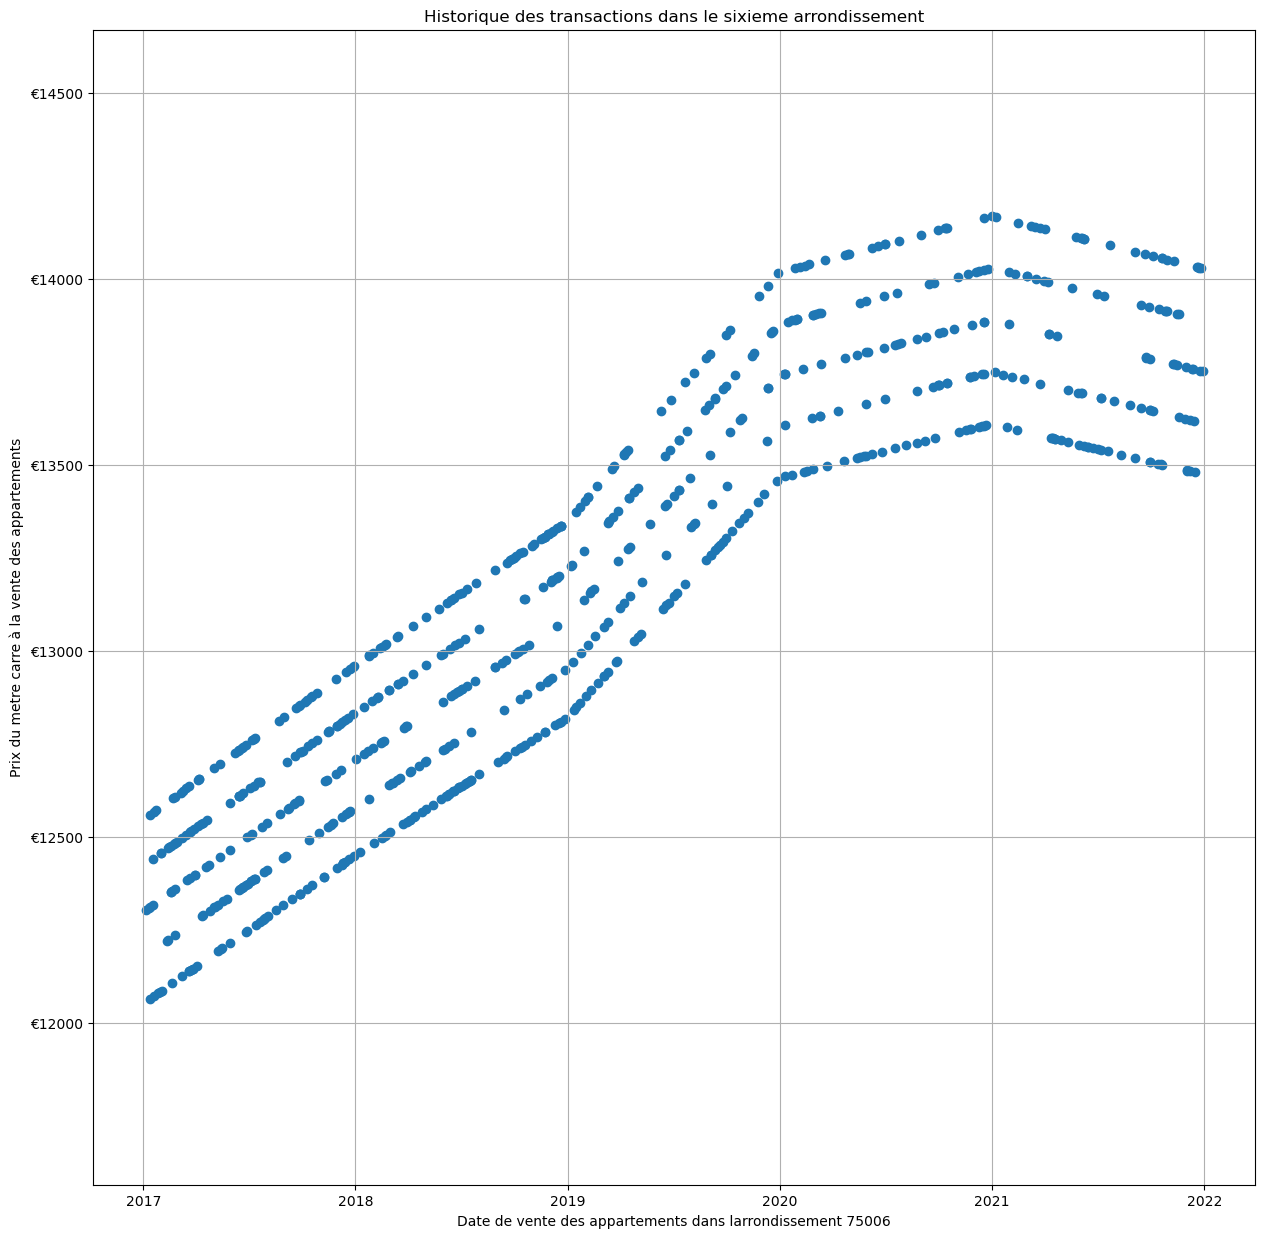

In [19]:
cp=75006

#Insérer ci-dessous le scatter plot
plt.figure(figsize=(15,15))
x = df_prix_appt.loc[df_prix_appt['code_postal']==cp,'date_mutation']
y = df_prix_appt.loc[df_prix_appt['code_postal']==cp,'prix_m2']
plt.scatter(x, y) 

plt.xlabel('Date de vente des appartements dans larrondissement 75006')
plt.ylabel('Prix du metre carre à la vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.ylim(min(y)-500,max(y)+500)
plt.grid(which='both')
plt.title('Historique des transactions dans le sixieme arrondissement')
plt.show()

On observe que ?

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson 

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [20]:
#On calcule la corrélation de Spearman
from scipy import stats
from scipy.stats import spearmanr

cp=75006
x = df_prix_appt.loc[df_prix_appt['code_postal']==cp,'date_mutation']
y = df_prix_appt.loc[df_prix_appt['code_postal']==cp,'prix_m2']

# Convertir des dates en integer afin de permettre le calcul de la corrélation
x_int = x.astype('int64')

# Calcul du coefficient de corrélation et du pvalue
rho, p = spearmanr(x_int, y)

# Coefficient de corrélation :
print(rho)

# P-value :
print(p)

print(f'Le coefficient de corrélation est de {round(rho,2)} avec une pvalue de {p} donc nous pouvons confirmer la corrélation.')




0.914844977318667
1.1999820574654143e-280
Le coefficient de corrélation est de 0.91 avec une pvalue de 1.1999820574654143e-280 donc nous pouvons confirmer la corrélation.


Le coefficient de corrélation est de ? avec une pvalue de ? donc nous pouvons confirmer la corrélation.

### 9. Vérification de la relation entre la valeur fonciere et la surface

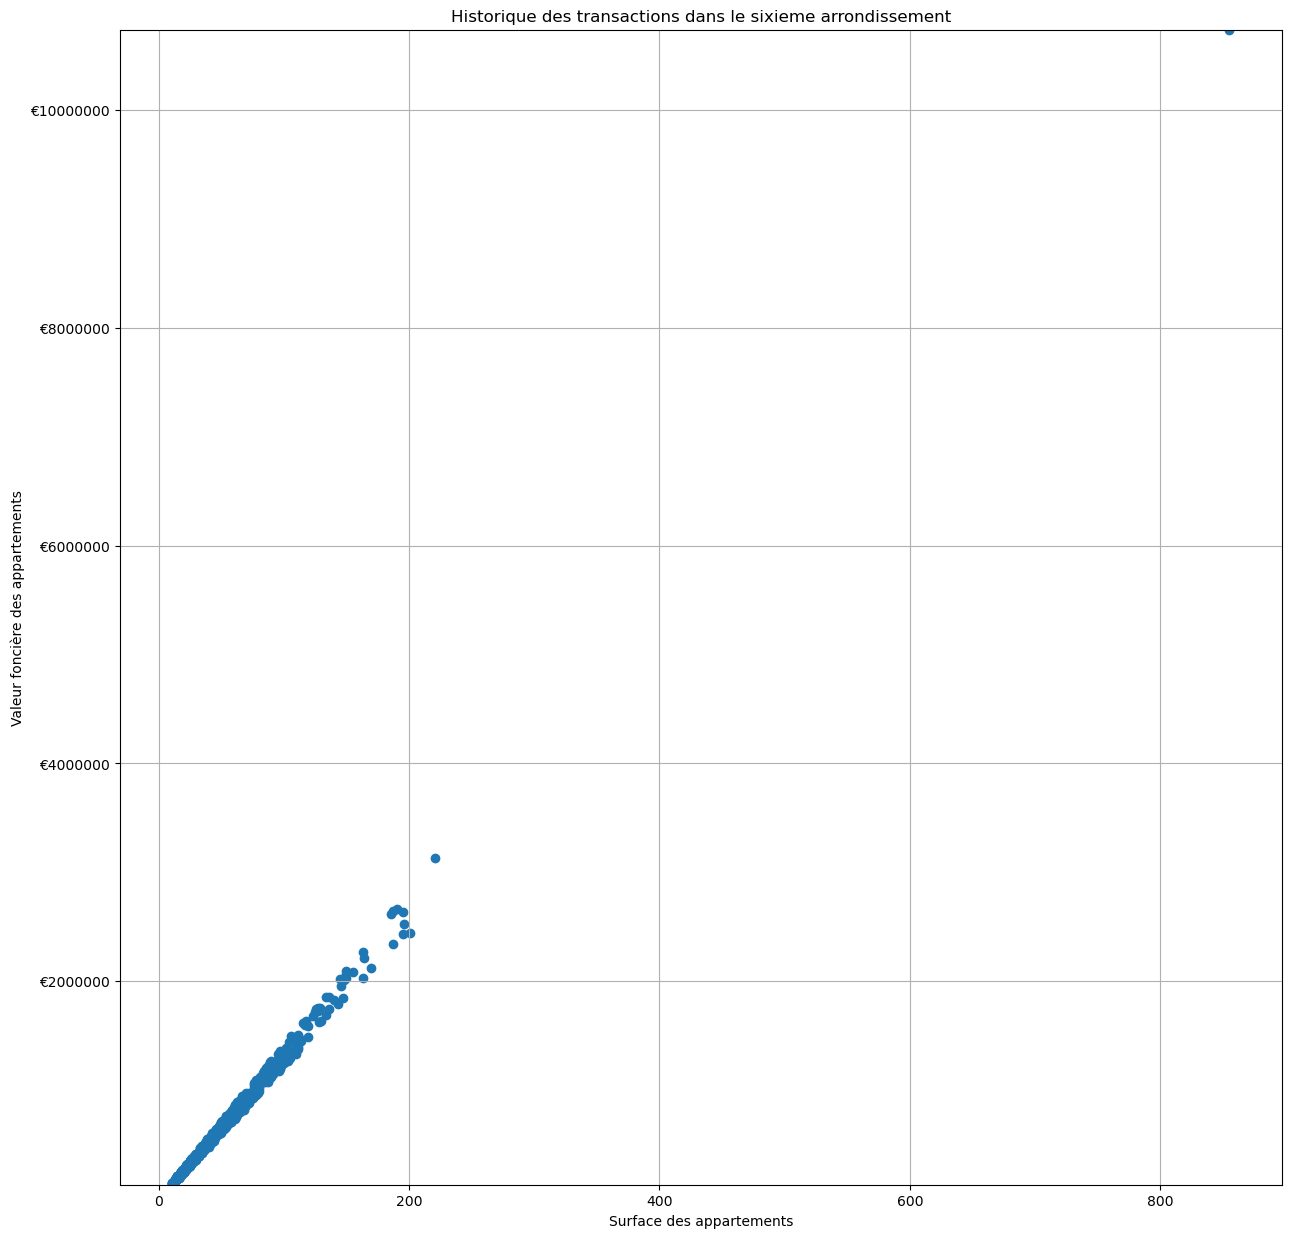

In [21]:
cp=75006

#Insérer ci-dessous le scatter plot
plt.figure(figsize=(15,15))
x = df_prix_appt.loc[df_prix_appt['code_postal']==cp,'surface_reelle']
y = df_prix_appt.loc[df_prix_appt['code_postal']==cp,'valeur_fonciere']
plt.scatter(x, y) 

plt.xlabel('Surface des appartements')
plt.ylabel('Valeur foncière des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.ylim(min(y)-500,max(y)+500)
plt.grid(which='both')
plt.title('Historique des transactions dans le sixieme arrondissement')
plt.show()

In [22]:
from scipy.stats import spearmanr

cp=75006
x = df_prix_appt.loc[df_prix_appt['code_postal']==cp,'surface_reelle']
y = df_prix_appt.loc[df_prix_appt['code_postal']==cp,'valeur_fonciere']


# Calcul du coefficient de corrélation et du pvalue
rho, p = spearmanr(x, y)

# Coefficient de corrélation :
print(rho)

# P-value :
print(p)

print(f'Le coefficient de corrélation est de {round(rho,3)} avec une pvalue de {p}. La relation est donc confirmée.')

0.9977685406899677
0.0
Le coefficient de corrélation est de 0.998 avec une pvalue de 0.0. La relation est donc confirmée.


Le coefficient de corrélation est de ? avec une pvalue de ?. La relation est donc confirmée.

Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés 

In [23]:
#On crée un dataset qui ne contient que les locaux commerciaux
df_prix_indus = df_historique.loc[df_historique['type_local']!='Appartement',['date_mutation','valeur_fonciere','code_postal','surface_reelle','prix_m2','annee']]
display(df_prix_indus.shape)
display(df_prix_indus.head(2))


(1843, 6)

,date_mutation,valeur_fonciere,code_postal,surface_reelle,prix_m2,annee
18,2017-02-01,3.113277e+06,75003,250,12453.109192,2017
29,2017-02-17,1.164375e+06,75003,95,12256.581685,2017


In [24]:
#Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année

# création du dataframe d'agrégation
prix_indus = df_prix_indus.groupby('annee').agg({'prix_m2':'mean'})
display(prix_indus)

# Reset de l'index
prix_indus = prix_indus.reset_index()


,prix_m2
annee,
2017,10949.909217
2018,11569.499180
2019,11960.132050
2020,11966.470204
2021,12006.488691


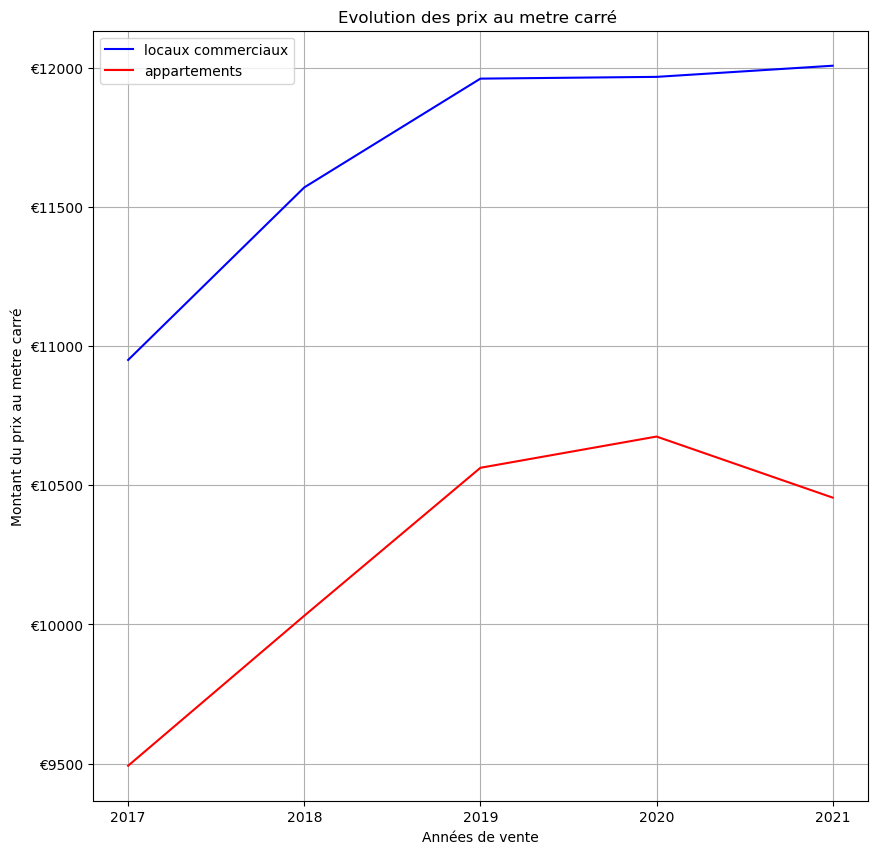

In [25]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
plt.figure(figsize=(10,10))
y = prix_indus['prix_m2']
y2 = prix_appt['prix_m2']
plt.plot(['2017','2018','2019','2020','2021'],y,label='locaux commerciaux',color='blue')
plt.plot(['2017','2018','2019','2020','2021'],y2,label='appartements',color='red')
plt.xlabel('Années de vente')
plt.ylabel('Montant du prix au metre carré')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution des prix au metre carré ')
plt.show()

Le prix au metre carré des locaux commerciaux est ?

In [26]:
moy_prix_indus = round(df_prix_indus['prix_m2'].mean(),2)

print(f'Le prix au metre carré des locaux commerciaux est de {moy_prix_indus}€')

Le prix au metre carré des locaux commerciaux est de 11705.02€


Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 
- la surface du bien immobilier,
- la date considérée, 
- la localisation (code_postal), 
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entrâiner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [27]:
# on crée un dataframe
data_m2 = df_historique[['code_postal','type_local','valeur_fonciere','surface_reelle','date_mutation']]
# colonne de surface renommée pour avoir un nom en commun lors de la mise en application sur un autre dataframe
data_m2 = data_m2.rename(columns={'surface_reelle': 'surface'})
# conversion de la date en valeurs numérique int64
data_m2.loc[:, 'date_mutation'] = data_m2['date_mutation'].astype('int64')
# on encode les colonnes code postal et type local et on transforme les valeurs en 1/0 au lieu de true/false
data_m2_enc = pd.get_dummies(data_m2, columns=['code_postal', 'type_local'], dtype=int)
# apercu
display(data_m2_enc.head(2))


,valeur_fonciere,surface,date_mutation,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,...,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé
0,5.505597e+05,50,1483401600000000000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.576492e+06,163,1484179200000000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [28]:
# On importe le train test split de la librairie sk_learn
from sklearn.model_selection import train_test_split

# On liste les données à utiliser
X = data_m2_enc.drop('valeur_fonciere', axis=1)  # Caractéristiques
y = data_m2_enc['valeur_fonciere']  # Variable cible

# On effectue le train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
#conversion des données en str


In [30]:
from sklearn.linear_model import LinearRegression

#On entraîne l'algorithme ci-dessous
reg=LinearRegression().fit(X_train, y_train)

# et on effectue la prédiction
y_pred_test = reg.predict(X_test)


Notre algorithme fait donc ? % d'erreur en moyenne sur la prédiction de la valeur foncière.

Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :
- ?


In [31]:
from sklearn.metrics import mean_absolute_percentage_error

# Scores
MAPE = mean_absolute_percentage_error(y_test, y_pred_test)*100

print(f'MAPE: {round(MAPE,2)}%')

MAPE: 10.65%


# Milestone 3 - Prédiction définitive pour le client 

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

In [32]:
#On importe les données dans un dataframe
df_portefeuille = pd.read_excel("portefeuille_actifs.xlsx", sheet_name='Portefeuille actifs')

print(df_portefeuille.dtypes)

print(df_portefeuille.shape)

display(df_portefeuille.head(2))

adresse_numero                 int64
adresse_nom_voie              object
code_postal                    int64
code_commune                   int64
nom_commune                   object
surface_carrez               float64
code_type_local                int64
type_local                    object
surface_reelle_bati            int64
nombre_pieces_principales      int64
longitude                    float64
latitude                     float64
dtype: object
(275, 12)


,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [33]:
# Création d'un dataframe allégé
data_m3 = df_portefeuille[['code_postal', 'surface_carrez', 'type_local']]
# colonne de surface renommée pour avoir le même nom entre les deux dataframe (test/entrainement et ce dataframe)
data_m3 = data_m3.rename(columns={'surface_carrez': 'surface'})
#On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction de la vente au 31/12/2022
import datetime as dt
data_m3['date_mutation'] = dt.datetime(2022, 12, 31)
# conversion de la date en valeurs numérique int64
data_m3.loc[:, 'date_mutation'] = data_m3['date_mutation'].astype('int64')


#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles
# on encode les valeurs texte et on transforme les valeurs en 1/0 au lieu de true/false
data_m3_enc = pd.get_dummies(data_m3, columns=['code_postal', 'type_local'], dtype=int)
# apercu
display(data_m3_enc.head(2))


,surface,date_mutation,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,...,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé
0,16.41,1672444800000000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,20.47,1672444800000000000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [34]:
#Conversion du dataframe en str


Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [35]:
#On effectue la prédiction

# On utilise le modèle entraîné pour prédire les valeurs foncières pour les nouvelles données
y_pred_m3 = reg.predict(data_m3_enc)

#On vérifie les 10 premières valeurs
df_portefeuille['valeur_fonciere_estimee'] = y_pred_m3
display(df_portefeuille.head(10))

df_portefeuille.to_excel('dataframe_projet8.xlsx', index=False)

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,valeur_fonciere_estimee
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227,206398.935469
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907,250533.016437
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318,728947.523964
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893,716016.842061
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490,251734.096855
5,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,33.40,2,Appartement,35,1,2.311643,48.875490,391095.014522
6,52,RUE DES GRAVILLIERS,75003,75103,Paris 3e Arrondissement,21.35,2,Appartement,24,2,2.355637,48.864366,260099.132470
7,208,RUE SAINT MAUR,75010,75110,Paris 10e Arrondissement,54.69,2,Appartement,60,3,2.371885,48.873209,622524.567144
8,142,RUE DE COURCELLES,75017,75117,Paris 17e Arrondissement,9.30,2,Appartement,11,1,2.300373,48.882505,129109.751646
9,52,RUE LAMARCK,75018,75118,Paris 18e Arrondissement,12.88,2,Appartement,13,1,2.342134,48.889431,168020.940766


Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [36]:
#Valorisation du portefeuille sur le segment des particuliers

valorisation_appart = round(df_portefeuille.loc[df_portefeuille['type_local']=='Appartement','valeur_fonciere_estimee'].sum()/1000000,2)
print(f'la valorisation du segment particulier est (en millions deuros):{valorisation_appart}M€')


la valorisation du segment particulier est (en millions deuros):67.06M€


In [37]:
#Valorisation du portefeuille sur le segment corporate
valorisation_commerce = round(df_portefeuille.loc[df_portefeuille['type_local']!='Appartement','valeur_fonciere_estimee'].sum()/1000000,2)
print(f'la valorisation du segment corporate est (en millions deuros):{valorisation_commerce}M€')


la valorisation du segment corporate est (en millions deuros):75.25M€


Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
- ?
- ?

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [38]:
#On importe les données dans un dataframe
df_aclasser = pd.read_excel("echantillon_a_classer.xlsx", sheet_name='Sheet1')

print(df_aclasser.shape)

(40, 4)


On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [39]:
# on crée la colonne du prix au m2

df_aclasser['prix_m2'] = round(df_aclasser['valeur_fonciere'] / df_aclasser['surface_reelle'],2)
display(df_aclasser.head())

# création d'un dataframe dédié au kmeans
data_m4 = df_aclasser['prix_m2']
display(data_m4.head())

,valeur_fonciere,code_postal,nom_commune,surface_reelle,prix_m2
0,868687.083271,75019,Paris 19e Arrondissement,88,9871.44
1,452050.762192,75019,Paris 19e Arrondissement,45,10045.57
2,193088.653587,75019,Paris 19e Arrondissement,21,9194.70
3,303012.549370,75019,Paris 19e Arrondissement,32,9469.14
4,149272.200110,75019,Paris 19e Arrondissement,20,7463.61


0     9871.44
1    10045.57
2     9194.70
3     9469.14
4     7463.61
Name: prix_m2, dtype: float64

Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

In [40]:
from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler

# Formatage des données en série Numpy puis en deux colonnes au lieu d'une
data_m4_2col = data_m4.values.reshape(-1, 1)

# On part sur 2 clusters (appartement/locaux commerciaux)
kmeans=KMeans(n_clusters=2, init='k-means++',n_init='auto')
kmeans.fit(data_m4_2col)
labels=kmeans.labels_
# On crée un nouveau dataframe pour voir le résultat
df_km=pd.DataFrame(data=data_m4_2col)
df_km['label_kmeans']=labels
df_km = df_km.rename(columns={0: 'prix_m2'})
display(df_km.head(10))

C:\Users\Marine\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Marine\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
C:\Users\Marine\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,prix_m2,label_kmeans
0,9871.44,1
1,10045.57,1
2,9194.70,1
3,9469.14,1
4,7463.61,0
5,9982.02,1
6,9674.26,1
7,7348.92,0
8,9789.05,1
9,7616.42,0


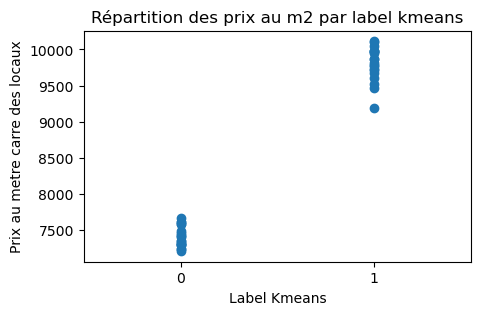

In [41]:
# On vérifie les données de la prédiction

# vision graphique de la répartition des prix par label kmeans
plt.figure(figsize=(5,3))
x = df_km['label_kmeans']
y = df_km['prix_m2']
plt.xlim(-0.5, 1.5)
plt.xticks([0, 1])
plt.scatter(x, y)
plt.xlabel('Label Kmeans')
plt.ylabel('Prix au metre carre des locaux')
plt.title('Répartition des prix au m2 par label kmeans')
plt.show()


Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement. 

In [42]:
#On remplace les labels kmeans par le type de local
df_km['type_local_estime']=df_km['label_kmeans'].apply(lambda x:'Appartement' if x==1 else 'Local industriel. commercial ou assimilé')
display(df_km.head(10))


,prix_m2,label_kmeans,type_local_estime
0,9871.44,1,Appartement
1,10045.57,1,Appartement
2,9194.70,1,Appartement
3,9469.14,1,Appartement
4,7463.61,0,Local industriel. commercial ou assimilé
5,9982.02,1,Appartement
6,9674.26,1,Appartement
7,7348.92,0,Local industriel. commercial ou assimilé
8,9789.05,1,Appartement
9,7616.42,0,Local industriel. commercial ou assimilé


In [43]:
#On affiche les résultats

# Sélection de la colonne à intégrer dans le dataframe final : le type de local
df_km_tomerge = df_km['type_local_estime']

# Fusion des dataframes en utilisant l'index comme clé de fusion
data_final_m4 = df_aclasser.merge(df_km_tomerge, left_index=True, right_index=True)

# Affichage du dataframe fusionné
display(data_final_m4)

,valeur_fonciere,code_postal,nom_commune,surface_reelle,prix_m2,type_local_estime
0,868687.083271,75019,Paris 19e Arrondissement,88,9871.44,Appartement
1,452050.762192,75019,Paris 19e Arrondissement,45,10045.57,Appartement
2,193088.653587,75019,Paris 19e Arrondissement,21,9194.70,Appartement
3,303012.549370,75019,Paris 19e Arrondissement,32,9469.14,Appartement
4,149272.200110,75019,Paris 19e Arrondissement,20,7463.61,Local industriel. commercial ou assimilé
5,179676.304545,75019,Paris 19e Arrondissement,18,9982.02,Appartement
6,241856.569418,75019,Paris 19e Arrondissement,25,9674.26,Appartement
7,462981.797149,75019,Paris 19e Arrondissement,63,7348.92,Local industriel. commercial ou assimilé
8,518819.726233,75019,Paris 19e Arrondissement,53,9789.05,Appartement
9,403670.310822,75019,Paris 19e Arrondissement,53,7616.42,Local industriel. commercial ou assimilé


# Milestone 5 - Analyse et présentation des résultats

Mes conclusions sur l'analyse et les limites de l'exercice :
- ?
- ?